# Best Feature Selection
### 1.1 Import Data and Required Packages  
Importing Pandas, Numpy, Matplotlib, Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

from sklearn.metrics import mean_squared_error

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud_data.csv')

Show Top 5 Records

In [3]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
df1=df.copy()

In [5]:

df1['average'] =( (df['math_score'] + df['reading_score'] + df['writing_score'])/3 ).round(0)
df1.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  average  
0                    none          72             72             74     73.0  
1               completed          69             90             88     82.0  
2                    none          90             95             93     93.0  
3                    none          47             57             44     49.0  
4                    none          76             78             75     76.0

In [6]:
features = list( df1.columns ) 
# features.remove('average') 
# features.remove('math_score') 
features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score',
 'average']

In [7]:
# Encoding Categorical Features

encoded_df = pd.get_dummies(df1[features])
encoded_df['average']=encoded_df.pop('average')  # to shift particular col at last of dataframe
list(encoded_df.columns)

['math_score',
 'reading_score',
 'writing_score',
 'gender_female',
 'gender_male',
 'race_ethnicity_group A',
 'race_ethnicity_group B',
 'race_ethnicity_group C',
 'race_ethnicity_group D',
 'race_ethnicity_group E',
 "parental_level_of_education_associate's degree",
 "parental_level_of_education_bachelor's degree",
 'parental_level_of_education_high school',
 "parental_level_of_education_master's degree",
 'parental_level_of_education_some college',
 'parental_level_of_education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none',
 'average']

In [8]:
encoded_df.head()

math_score  reading_score  writing_score  gender_female  gender_male  \
0          72             72             74              1            0   
1          69             90             88              1            0   
2          90             95             93              1            0   
3          47             57             44              0            1   
4          76             78             75              0            1   

   race_ethnicity_group A  race_ethnicity_group B  race_ethnicity_group C  \
0                       0                       1                       0   
1                       0                       0                       1   
2                       0                       1                       0   
3                       1                       0                       0   
4                       0                       0                       1   

   race_ethnicity_group D  race_ethnicity_group E  ...  \
0                       0                       0  ...   
1                       0                       0  ...   
2                       0                       0  ...   
3                       0                       0  ...   
4                       0                       0  ...   

   parental_level_of_education_bachelor's degree  \
0                                              1   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   parental_level_of_education_high school  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   parental_level_of_education_master's degree  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

   parental_level_of_education_some college  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   parental_level_of_education_some high school  lunch_free/reduced  \
0                                             0                   0   
1                                             0                   0   
2                                             0                   0   
3                                             0                   1   
4                                             0                   0   

   lunch_standard  test_preparation_course_completed  \
0               1                                  0   
1               1                                  1   
2               1                                  0   
3               0                                  0   
4               1                                  0   

   test_preparation_course_none  average  
0                             1     73.0  
1                             0     82.0  
2                             1     93.0  
3                             1     49.0  
4                             1     76.0  

[5 rows x 21 columns]

In [9]:
encoded_df.shape

(1000, 21)

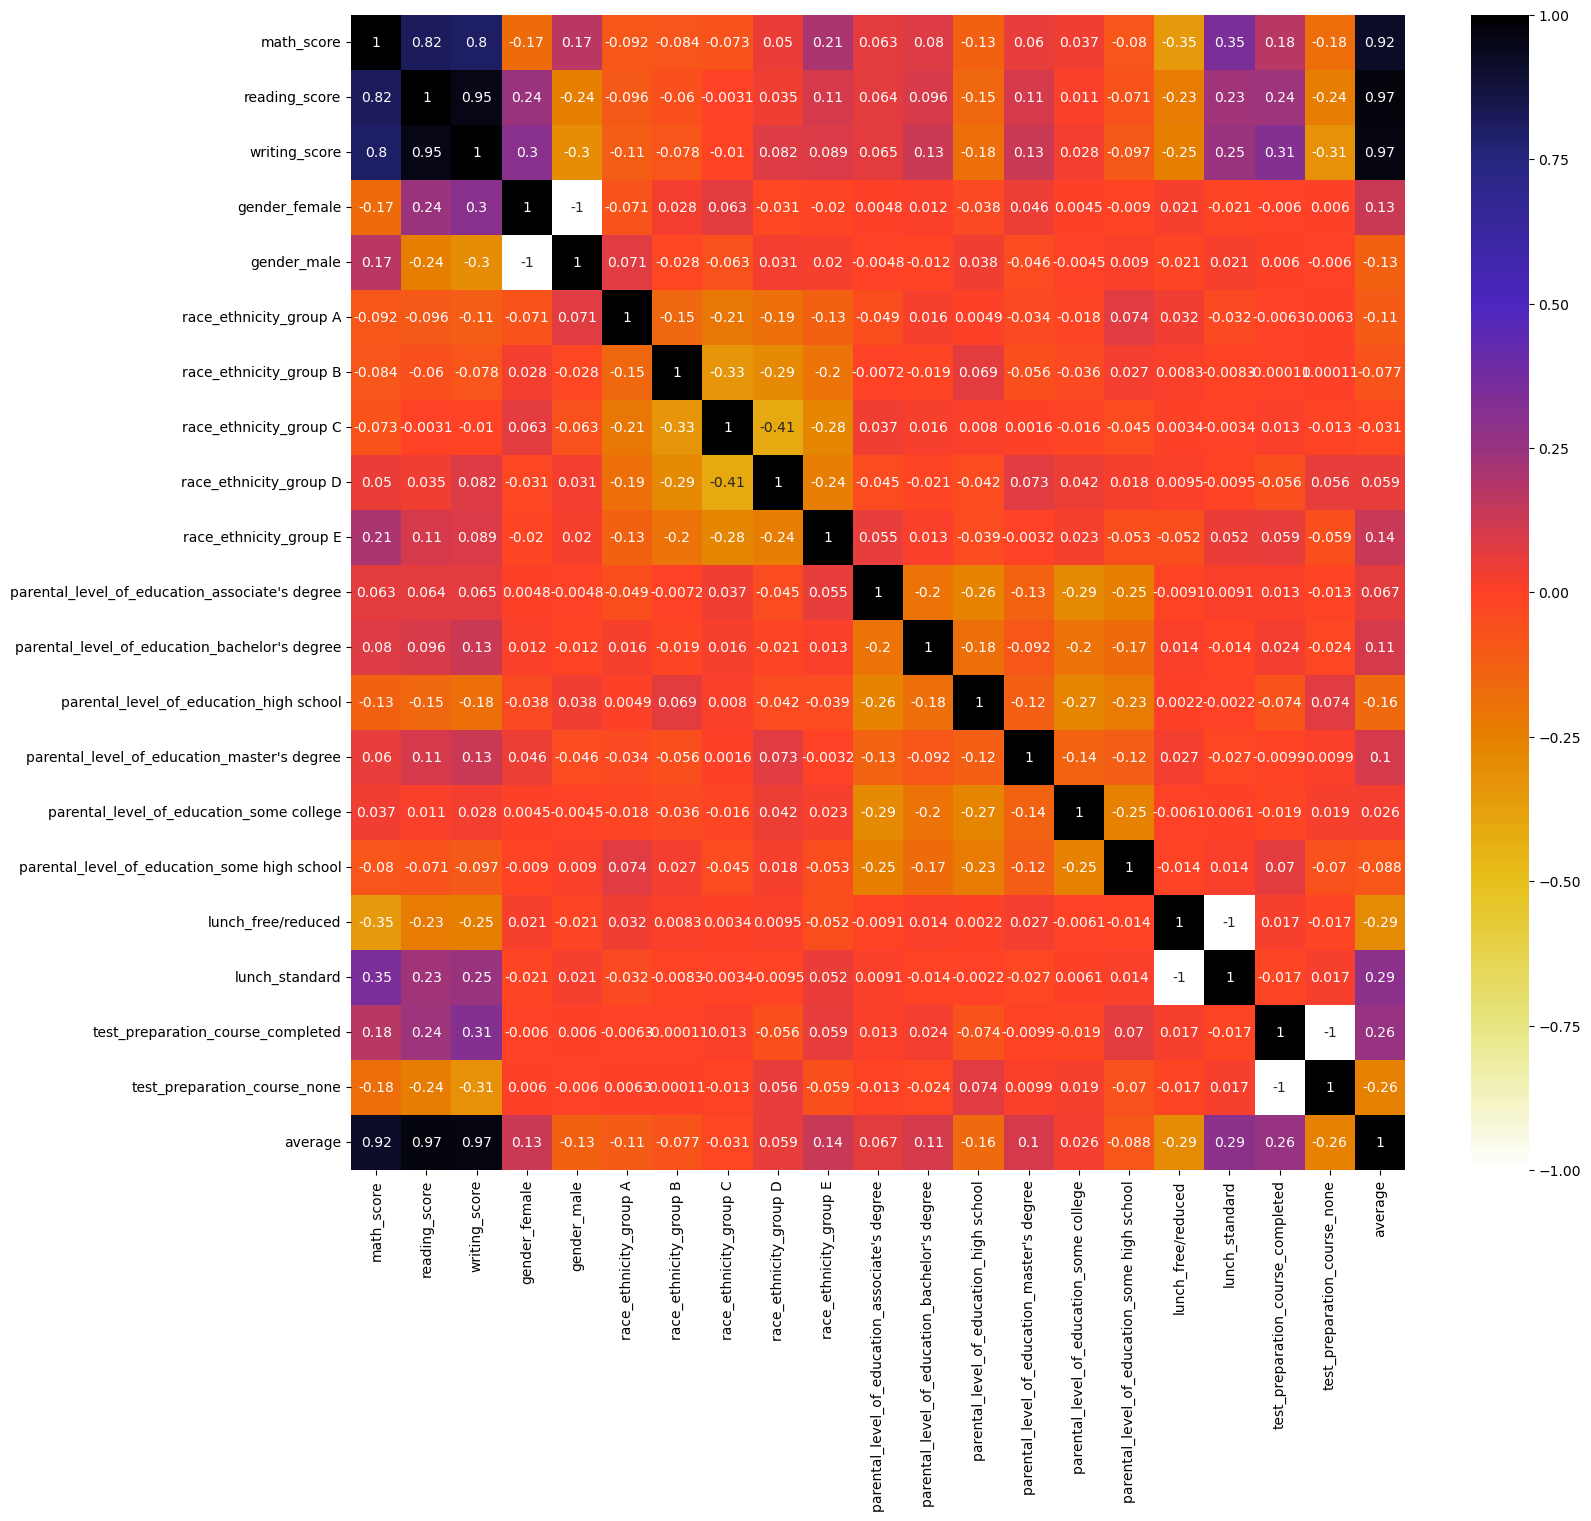

In [10]:
import seaborn as sns

plt.figure(figsize=(17,15))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Feature removal- With Correlation  
In this step we will be removing the features which are highly correlated

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(encoded_df, 0.8)
len(set(corr_features))

3

In [13]:
corr_features

{'average', 'reading_score', 'writing_score'}

From the above we can remove the 2 features which are high colerated 
to eachother.  
Because of duplicacy will be there of data.  
Total features is 20 Now it's 18 features.  
*Note:- average is target feature so we can't remove.

### Preparing X and Y variables

In [14]:
X = encoded_df
X= X.drop(['average','writing_score','reading_score'],axis=1)
# Y = df1.average
Y = encoded_df.average

In [15]:
X.columns

Index(['math_score', 'gender_female', 'gender_male', 'race_ethnicity_group A',
       'race_ethnicity_group B', 'race_ethnicity_group C',
       'race_ethnicity_group D', 'race_ethnicity_group E',
       'parental_level_of_education_associate's degree',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_master's degree',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test_preparation_course_completed',
       'test_preparation_course_none'],
      dtype='object')

In [16]:
Y

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: average, Length: 1000, dtype: float64

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 18), (200, 18))

In [18]:
Y_train.shape, Y_test.shape

((800,), (200,))

## Best Feature Selection- Mutual information In Regression

Estimate mutual information for a continuous target variable.  

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.  

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.  

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.   

Inshort  
  
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.  

The mutual information between two random variables X and Y can be stated formally as follows:  

#### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [37]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
#np.random.seed(42)
mutual_info = mutual_info_regression(X_train,Y_train,random_state=42)
mutual_info

array([7.39846534e-01, 2.58025201e-02, 5.95251075e-03, 6.75257201e-04,
       1.26330007e-02, 0.00000000e+00, 1.60461545e-02, 5.79186208e-03,
       0.00000000e+00, 5.54704926e-03, 2.12507643e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.55272801e-02, 2.13799150e-02,
       6.74967176e-02, 4.91356763e-02])

In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

math_score                                        0.739847
test_preparation_course_completed                 0.067497
test_preparation_course_none                      0.049136
lunch_free/reduced                                0.035527
gender_female                                     0.025803
lunch_standard                                    0.021380
parental_level_of_education_high school           0.021251
race_ethnicity_group D                            0.016046
race_ethnicity_group B                            0.012633
gender_male                                       0.005953
race_ethnicity_group E                            0.005792
parental_level_of_education_bachelor's degree     0.005547
race_ethnicity_group A                            0.000675
race_ethnicity_group C                            0.000000
parental_level_of_education_associate's degree    0.000000
parental_level_of_education_master's degree       0.000000
parental_level_of_education_some college          0.0000

<AxesSubplot:>

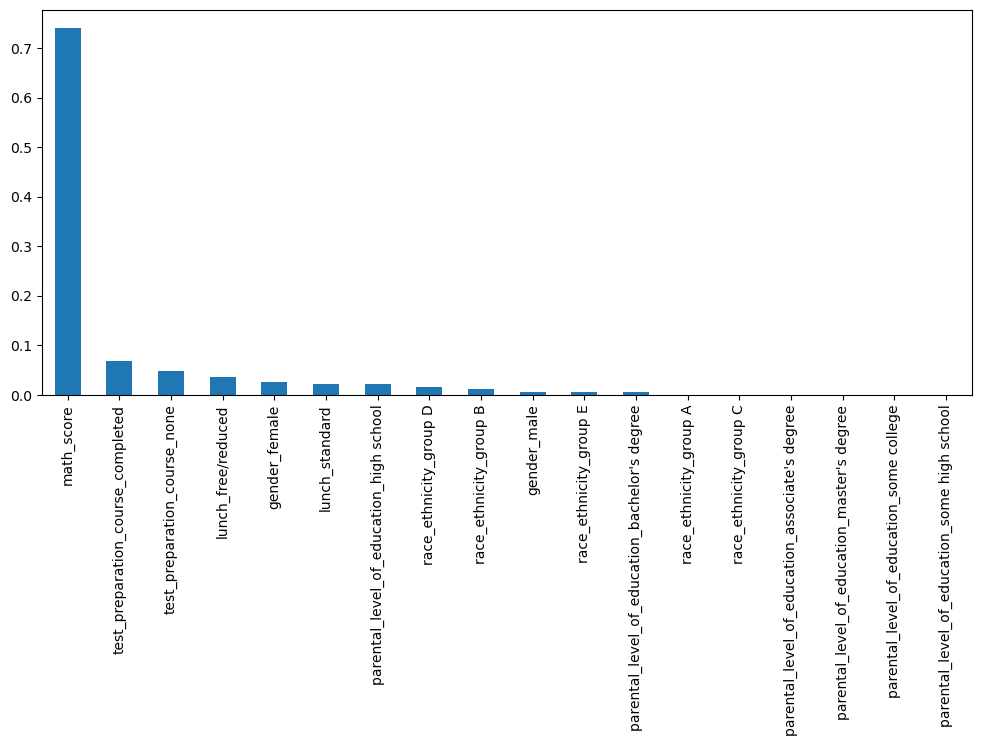

In [39]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,5))

# Select only TOP 10 best features

In [40]:

top=mutual_info.sort_values(ascending=False)[:10]
X_train[top.index]

math_score  test_preparation_course_completed  \
29           62                                  0   
535          66                                  1   
695          79                                  0   
557          61                                  0   
836          73                                  0   
..          ...                                ...   
106          87                                  0   
270          69                                  0   
860          53                                  0   
435          50                                  1   
102          85                                  0   

     test_preparation_course_none  lunch_free/reduced  gender_female  \
29                              1                   0              1   
535                             0                   1              1   
695                             1                   1              1   
557                             1                   1              0   
836                             1                   0              0   
..                            ...                 ...            ...   
106                             1                   0              1   
270                             1                   0              0   
860                             1                   0              1   
435                             0                   1              0   
102                             1                   0              1   

     lunch_standard  parental_level_of_education_high school  \
29                1                                        0   
535               0                                        0   
695               0                                        0   
557               0                                        0   
836               1                                        1   
..              ...                                      ...   
106               1                                        0   
270               1                                        0   
860               1                                        0   
435               0                                        0   
102               1                                        0   

     race_ethnicity_group D  race_ethnicity_group B  gender_male  
29                        1                       0            0  
535                       0                       0            0  
695                       1                       0            0  
557                       0                       0            1  
836                       0                       0            1  
..                      ...                     ...          ...  
106                       1                       0            0  
270                       0                       0            1  
860                       0                       0            0  
435                       0                       0            1  
102                       1                       0            0  

[800 rows x 10 columns]

### Exporting in a .CSV File for further using

In [23]:
X_train[top.index].to_csv('X_train.csv',index=False)
X_test[top.index].to_csv('X_test.csv',index=False)

Y_train.to_csv('Y_train.csv',index=False)
Y_test.to_csv('Y_test.csv',index=False)



In [24]:
# np.random.seed(42)
# from sklearn.feature_selection import SelectKBest

# #No we Will select the  top 10 important features
# sel_ten_cols = SelectKBest(mutual_info_regression, k=10)
# sel_ten_cols.fit(X_train, Y_train)
# X_train.columns[sel_ten_cols.get_support()]

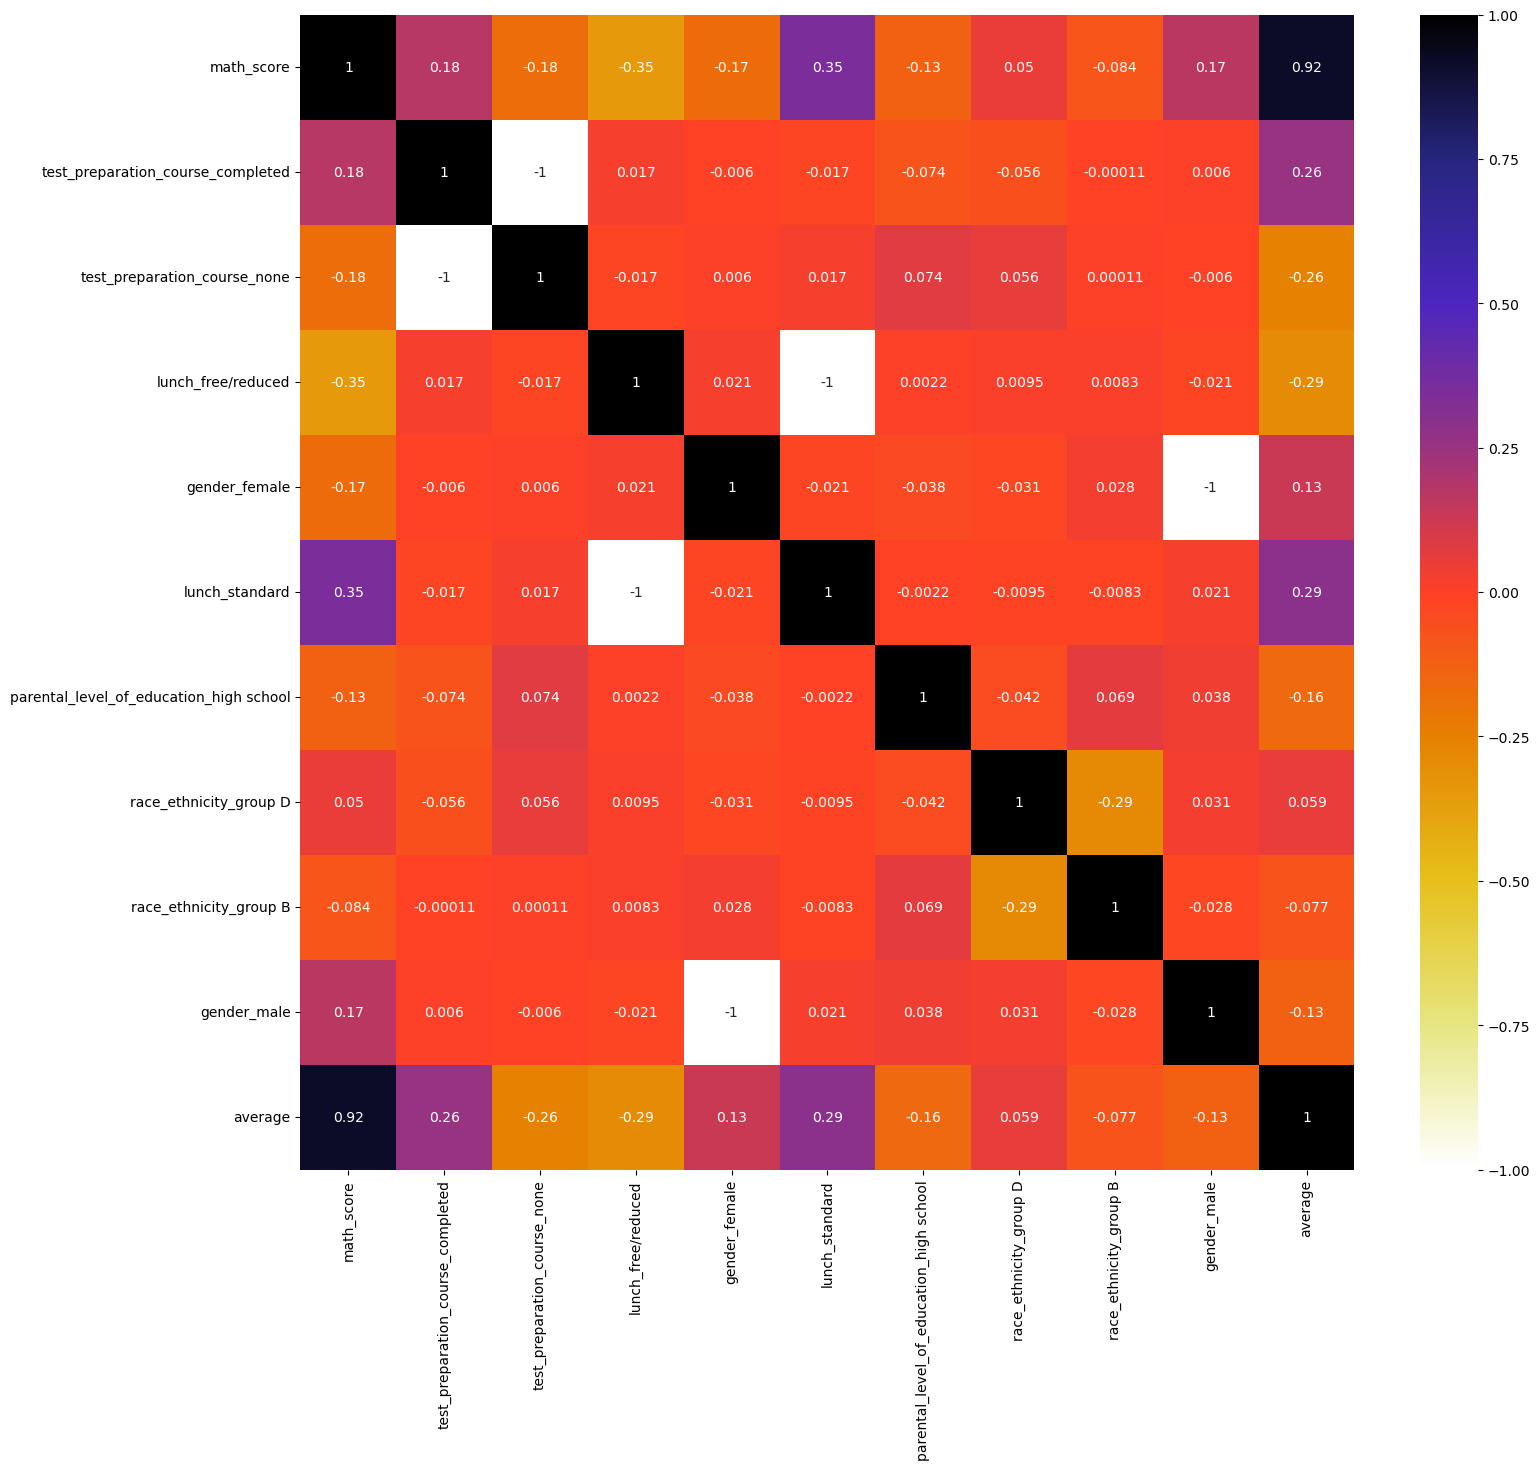

In [25]:
import seaborn as sns

col=list(top.index)
col.append('average')
col

plt.figure(figsize=(17,15))
cor = encoded_df[col].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
encoded_df[top.index].columns

Index(['math_score', 'test_preparation_course_completed',
       'test_preparation_course_none', 'lunch_free/reduced', 'gender_female',
       'lunch_standard', 'parental_level_of_education_high school',
       'race_ethnicity_group D', 'race_ethnicity_group B', 'gender_male'],
      dtype='object')

In [32]:
print(type(top))
top

<class 'pandas.core.series.Series'>


math_score                                 0.739847
test_preparation_course_completed          0.067497
test_preparation_course_none               0.049136
lunch_free/reduced                         0.035527
gender_female                              0.025803
lunch_standard                             0.021380
parental_level_of_education_high school    0.021251
race_ethnicity_group D                     0.016046
race_ethnicity_group B                     0.012633
gender_male                                0.005953
dtype: float64

In [57]:
fdf=top.to_frame()  # convert pandas Series to DataFrame
fdf.rename(columns={0:"Values"},inplace=True)   # Rename the column 
fdf

Values
math_score                               0.739847
test_preparation_course_completed        0.067497
test_preparation_course_none             0.049136
lunch_free/reduced                       0.035527
gender_female                            0.025803
lunch_standard                           0.021380
parental_level_of_education_high school  0.021251
race_ethnicity_group D                   0.016046
race_ethnicity_group B                   0.012633
gender_male                              0.005953

In [58]:
fdf.style.background_gradient(cmap ='coolwarm')

In [52]:
# fdf.style.background_gradient(cmap ='viridis')